___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Простая линейная регрессия

В этом примере мы построим простую линию тренда с помощью классического уравнения y=mx+b. Мы аккуратно пройдём каждый шаг этого процесса, чтобы Вы увидели, на какие вопросы может ответить такая линия тренда. Имейте ввиду, что этот путь является упрощённым, и в будущем мы будем действовать немного по-другому. Тем не менее, тот подход, который мы сейчас посмотрим, позволит Вам увидеть линейную регрессию так, как видел её [Фрэнсис Гальтон](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BB%D1%8C%D1%82%D0%BE%D0%BD,_%D0%A4%D1%80%D1%8D%D0%BD%D1%81%D0%B8%D1%81).

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Мы будем использовать данные из книги ISLR (Introduction to Statistical Learning: With Applications in R). Это будут продажи определённого продукта (в тысячах единиц), как функция от бюджета рекламы на ТВ, радио и в газетах (в тысячах долларов).

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Есть ли связь между *общими* расходами на рекламу и *продажами*?**

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

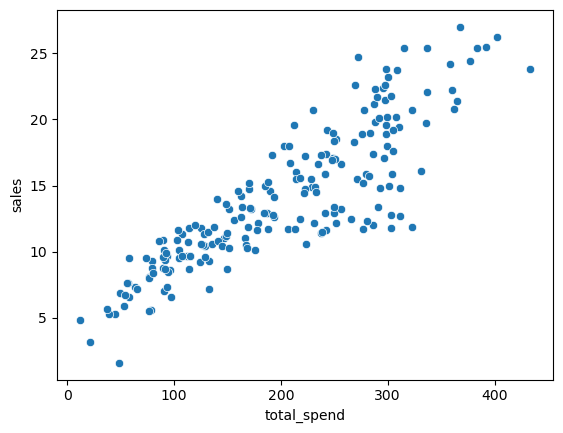

In [5]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Линия наименьших квадратов

Формулы можно посмотреть [в википедии](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F).

**На какой вопрос отвечает линия тренда.**
Если кто-то планирует потратить на рекламу $200 , то на какие продажи он может рассчитывать? Мы упростили постановку задачи, объединив все отдельные признаки в один признак "общие затраты на рекламу", но мы вернёмся чуть позже к задаче с несколькими признаками. Сейчас давайте убедимся, что мы понимаем, на какой вопрос может ответить линия линейной регрессии.

**В следующей рекламной кампании мы планируем всего потратить $200. Сколько единиц товара мы ожидаем продать благодаря этой рекламе?**

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

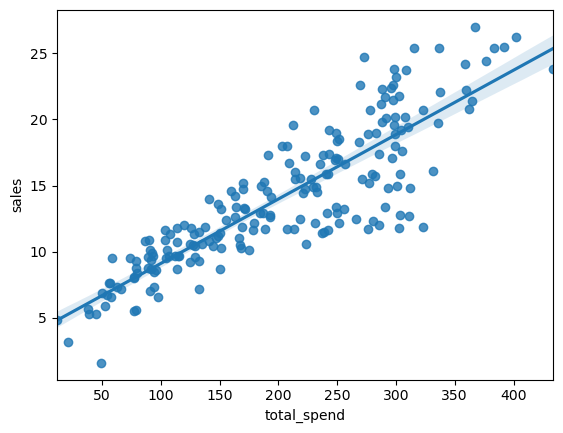

In [6]:
# По сути мы хотим выяснить, как мы можем нарисовать вот такую линию (которую рисует regplot)
sns.regplot(x='total_spend',y='sales',data=df)

Для этого нам нужно решить следующее уравнение: $$y=mx+b$$

Здесь мы ищем коэффициенты m и b. Как показано в видео-лекции, мы решаем общую форму уравнения:

$$ \hat{y} = \beta_0 + \beta_1X$$

Здесь у нас есть матрицы значений - известная матрица продаж Y и известная матрица расходов на рекламу X. Неизвестными являются коэффициенты *beta*, и в случае матриц это уже не одно число, а несколько чисел. Таким образом, мы работаем не с одним, а с несколькими признаками. Эти коэффициенты также помогут нам понять, какие из признаков обладают наибольшей возможностью предсказывать целевое значение Y. Здесь Y с галочкой сверху - это оценка (прогнозирование) целевого значения, а Y - это истинное значение, которое известно для некоторых точек.

Для решения уравнения мы можем использовать NumPy (при желании Вы также можете решить уравнение [вручную](https://towardsdatascience.com/building-a-linear-regression-by-hand-b930e63bf0ae/)).

In [7]:
X = df['total_spend']
y = df['sales']

In [8]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [9]:
# Сначала возвращаются коэффициенты более высоких порядков (степеней полинома)!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [10]:
# Потенциальные расходы бюджета в будущем
potential_spend = np.linspace(0,500,100)

In [11]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

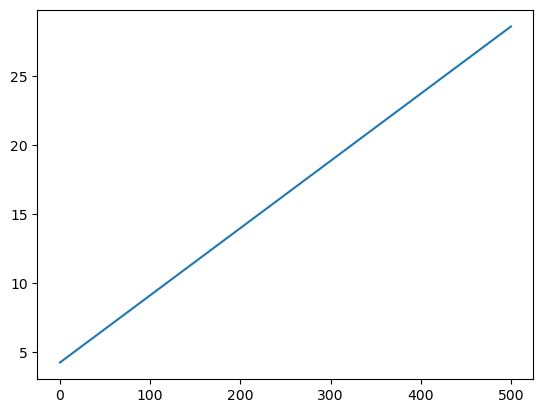

In [12]:
plt.plot(potential_spend,predicted_sales)

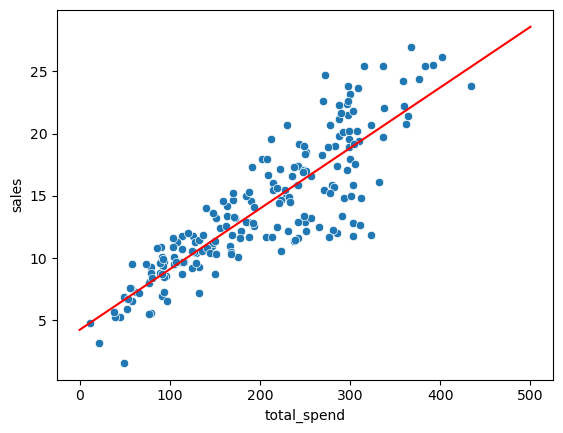

In [13]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**В следующей рекламной кампании мы планируем всего потратить $200. Сколько единиц товара мы ожидаем продать благодаря этой рекламе?**

In [14]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [15]:
predicted_sales

13.98060422

# Дополнительные вопросы... которые мы чуть позже разберём намного более подробно!

## Переобучение (Overfitting), Недообучение (Underfitting) и измерение производительности

Обратите внимание, что мы использовали значение order=1, то есть прямую линию. При желании мы можем применить полиномы более высоких порядков, но станет ли предсказание лучше? Бывают ли ситуации, когда мы слишком хорошо обучили модель? Или слишком плохо? Как мы можем это узнать, и как вообще определить, хорошо или плохо выполнено обучение?

In [16]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
# Потенциальные расходы бюджета в будущем
potential_spend = np.linspace(0,500,100)

In [18]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

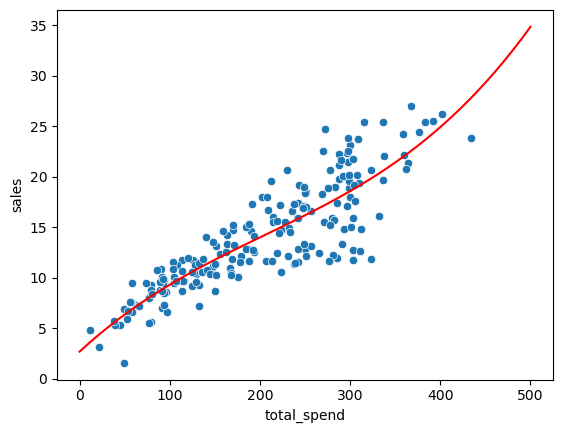

In [19]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Эта линия лучше или хуже прямой линии? Каким образом мы можем это измерить?**

## Несколько признаков

В исходных данных есть 3 признака, а не только общие расходы на рекламу. Сможем ли мы повторить процесс и получить более точные результаты?

In [20]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [21]:
# Здесь мы передаём в массиве X три отдельных признака
np.polyfit(X,y,1) # эта команда приведёт к ошибке - см. комментарий ниже

TypeError: expected 1D vector for x

**Ну вот... Polyfit работает только с одномерным массивом X! Нам нужно переходить к более мощной библиотеке...**

-------
--------